In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
df = pd.read_csv('../data/regression/villa_prices_preprocessed.csv').drop(['Unnamed: 0'], axis = 1)
df

price  rooms  ...  neighborhood_Uhud  neighborhood_Uqaz
0     1300000.0      4  ...                  0                  0
1     2500000.0      5  ...                  0                  0
2     1300000.0      5  ...                  0                  0
3     1550000.0      6  ...                  0                  0
4     1000000.0      4  ...                  0                  0
...         ...    ...  ...                ...                ...
1391   900000.0      3  ...                  0                  0
1392   950000.0      5  ...                  0                  0
1393  1350000.0      6  ...                  0                  0
1394  1600000.0      4  ...                  0                  0
1395  1850000.0      4  ...                  0                  0

[1396 rows x 135 columns]

# Аномалии

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


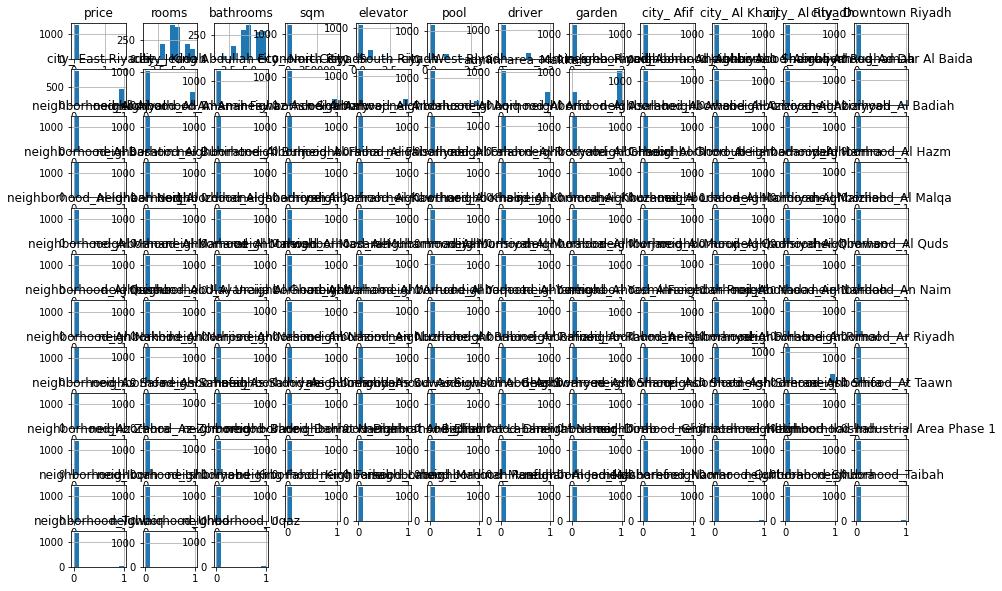

In [43]:
fig = plt.figure(figsize = (15,10))
df.hist(ax = fig.gca())
plt.show()

Аномалии в данных имеются, используем IsolationForest, чтобы от них избавиться

In [46]:
raw = df.drop(['price'], axis = 1)
clf = IsolationForest()
predict = clf.fit_predict(raw)

In [47]:
for index, row in raw.iterrows():
  if predict[index] == -1:
    df.drop([index], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


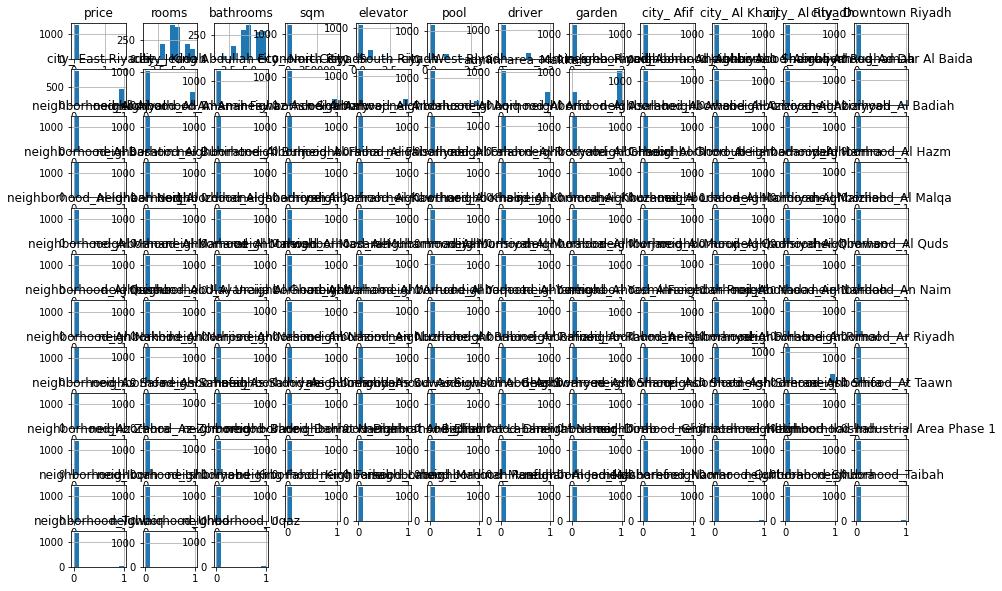

In [48]:
fig = plt.figure(figsize = (15,10))
df.hist(ax = fig.gca())
plt.show()

# Выборки

In [49]:
X = df.drop(['price'], axis=1)
y = df['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [51]:
print(len(X_train))
print(len(X_test))

977
419


In [52]:
np.std(X_train, axis=1).mean()

100.24339470069337

данные нужно нормировать

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
np.std(X_train, axis=1).mean()

0.771499562408972

# Обучение

## Linear Regression 

( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression )

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

In [57]:
#R^2:
print('R^2: ' + str(r2_score(y_test, y_predict)))
#MSE:
print('MSE: ' + str(mean_squared_error(y_test, y_predict)))
#RMSE:
print('RMSE: ' + str(sqrt(mean_squared_error(y_test, y_predict))))
#MAE:
print('MAE: ' + str(mean_absolute_error(y_test, y_predict)))

R^2: -1.1468408312637875e+24
MSE: 2.9053769849513364e+36
RMSE: 1.7045166426149486e+18
MAE: 3.7557456412426406e+17


## Decision Tree Regressor

( https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor )

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_predict = tree.predict(X_test)

In [61]:
#R^2:
print('R^2: ' + str(r2_score(y_test, y_predict)))
#MSE:
print('MSE: ' + str(mean_squared_error(y_test, y_predict)))
#RMSE:
print('RMSE: ' + str(sqrt(mean_squared_error(y_test, y_predict))))
#MAE:
print('MAE: ' + str(mean_absolute_error(y_test, y_predict)))

R^2: -8.780262859206504
MSE: 24777065694984.0
RMSE: 4977656.646955875
MAE: 664362.8249801114


## Lasso Regressor

( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso ,

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV )

In [62]:
from sklearn.linear_model import Lasso

In [63]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.408119167242133e+16, tolerance: 3934810825341.9185
  positive)


In [64]:
#R^2:
print('R^2: ' + str(r2_score(y_test, y_predict)))
#MSE:
print('MSE: ' + str(mean_squared_error(y_test, y_predict)))
#RMSE:
print('RMSE: ' + str(sqrt(mean_squared_error(y_test, y_predict))))
#MAE:
print('MAE: ' + str(mean_absolute_error(y_test, y_predict)))

R^2: -0.22732452206309173
MSE: 3109272291551.6055
RMSE: 1763312.873982268
MAE: 1024285.0656015482


In [65]:
from sklearn.linear_model import LassoCV

In [68]:
lasso_cv = LassoCV()
lasso_cv.fit(X_train, y_train)
y_predict = lasso_cv.predict(X_test)

In [69]:
#R^2:
print('R^2: ' + str(r2_score(y_test, y_predict)))
#MSE:
print('MSE: ' + str(mean_squared_error(y_test, y_predict)))
#RMSE:
print('RMSE: ' + str(sqrt(mean_squared_error(y_test, y_predict))))
#MAE:
print('MAE: ' + str(mean_absolute_error(y_test, y_predict)))

R^2: -0.036520449122838805
MSE: 2625894173993.043
RMSE: 1620461.0991915367
MAE: 1007359.6841653984


## Ridge Regression

( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge ,

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV )

In [70]:
from sklearn.linear_model import Ridge

In [71]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_predict = ridge.predict(X_test)

In [72]:
#R^2:
print('R^2: ' + str(r2_score(y_test, y_predict)))
#MSE:
print('MSE: ' + str(mean_squared_error(y_test, y_predict)))
#RMSE:
print('RMSE: ' + str(sqrt(mean_squared_error(y_test, y_predict))))
#MAE:
print('MAE: ' + str(mean_absolute_error(y_test, y_predict)))

R^2: -0.2212074976061733
MSE: 3093775579550.2285
RMSE: 1758913.1813566661
MAE: 1019642.2246497901


In [73]:
from sklearn.linear_model import RidgeCV

In [74]:
ridge_cv = RidgeCV()
ridge_cv.fit(X_train, y_train)
y_predict = ridge_cv.predict(X_test)

In [75]:
#R^2:
print('R^2: ' + str(r2_score(y_test, y_predict)))
#MSE:
print('MSE: ' + str(mean_squared_error(y_test, y_predict)))
#RMSE:
print('RMSE: ' + str(sqrt(mean_squared_error(y_test, y_predict))))
#MAE:
print('MAE: ' + str(mean_absolute_error(y_test, y_predict)))

R^2: -0.19525178383528274
MSE: 3028020043679.7197
RMSE: 1740120.6980206056
MAE: 998677.646846599


## Elastic Net Regressor

( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet ,

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV )

In [76]:
from sklearn.linear_model import ElasticNet

In [77]:
net = ElasticNet()
net.fit(X_train, y_train)
y_redict = net.predict(X_test)

In [78]:
#R^2:
print('R^2: ' + str(r2_score(y_test, y_predict)))
#MSE:
print('MSE: ' + str(mean_squared_error(y_test, y_predict)))
#RMSE:
print('RMSE: ' + str(sqrt(mean_squared_error(y_test, y_predict))))
#MAE:
print('MAE: ' + str(mean_absolute_error(y_test, y_predict)))

R^2: -0.19525178383528274
MSE: 3028020043679.7197
RMSE: 1740120.6980206056
MAE: 998677.646846599


In [79]:
from sklearn.linear_model import ElasticNetCV

In [80]:
net_cv = ElasticNetCV()
net_cv.fit(X_train, y_train)
y_predict = net_cv.predict(X_test)

In [81]:
#R^2:
print('R^2: ' + str(r2_score(y_test, y_predict)))
#MSE:
print('MSE: ' + str(mean_squared_error(y_test, y_predict)))
#RMSE:
print('RMSE: ' + str(sqrt(mean_squared_error(y_test, y_predict))))
#MAE:
print('MAE: ' + str(mean_absolute_error(y_test, y_predict)))

R^2: -0.03523952918858875
MSE: 2622649124466.4805
RMSE: 1619459.516155461
MAE: 1006412.029141075


# Гиперпараметры

In [82]:
from sklearn.model_selection import GridSearchCV

## Linear Regression:

In [86]:
param_grid1 = { 'fit_intercept': [True, False]}
lr_gs = GridSearchCV(reg, param_grid1, 'neg_mean_squared_error')
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [87]:
lr_gs.best_estimator_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [88]:
-lr_gs.best_score_

1.3363613982109167e+40

In [89]:
lr_gs.best_params_

{'fit_intercept': False}

## Lasso Regressor:

In [91]:
param_grid2 = { 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'fit_intercept': [True, False],
                'max_iter': [100, 1000, 10000],
                'selection': ['cyclic', 'random'] }
lasso_gs = GridSearchCV(lasso, param_grid2, 'neg_mean_squared_error')
lasso_gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7314978110363884e+16, tolerance: 3896353998796.609
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2201191560954956e+16, tolerance: 2927866883481.9585
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7571568997455092e+16, tolerance: 3897368211625.9907
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 1000, 10000],
                         'selection': ['cyclic', 'random']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [92]:
lasso_gs.best_estimator_

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='random',
      tol=0.0001, warm_start=False)

In [93]:
-lasso_gs.best_score_

2.2663080976060524e+16

In [94]:
lasso_gs.best_params_

{'alpha': 100, 'fit_intercept': True, 'max_iter': 100, 'selection': 'random'}

## Ridge Regression:

In [96]:
param_grid3 = { 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'fit_intercept': [True, False],
                'max_iter': [100, 1000],
                'solver': ['svd', 'cholesky', 'sparse_cg'] }
ridge_gs = GridSearchCV(ridge, param_grid3, 'neg_mean_squared_error')
ridge_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 1000],
                         'solver': ['svd', 'cholesky', 'sparse_cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [97]:
ridge_gs.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=None, solver='svd', tol=0.001)

In [98]:
-ridge_gs.best_score_

41796521699007.54

In [99]:
ridge_gs.best_params_

{'alpha': 100, 'fit_intercept': True, 'max_iter': 100, 'solver': 'svd'}

## Elastic Net Regressor:

In [101]:
param_grid4 = { 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'l1_ratio': [0, 0.5, 1],
                'fit_intercept': [True, False],
                'max_iter': [100, 1000],
                'selection': ['cyclic', 'random'] }
net_gs = GridSearchCV(net, param_grid4, 'neg_mean_squared_error')
net_gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7315381215122458e+16, tolerance: 3896353998796.609
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2652419200421926e+16, tolerance: 2927866883481.9585
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7571857968510142e+16, tolerance: 3897368211625.9907
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0, 0.5, 1], 'max_iter': [100, 1000],
                         'selection': ['cyclic', 'random']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [103]:
net_gs.best_estimator_

ElasticNet(alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='random', tol=0.0001, warm_start=False)

In [104]:
-net_gs.best_score_

40177456788423.7

In [105]:
net_gs.best_params_

{'alpha': 10,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'selection': 'random'}